In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import time
import TDMS_MHD as MHD
import pandas as pd
%matplotlib inline


class VaporTubes(MHD.TDMS,MHD.TDMS_pd):
    def __init__(self, ):
        MHD.TDMS.__init__(self) 
        MHD.TDMS_pd.__init__(self)   
    
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx
    
    


In [17]:
a = VaporTubes()
laserprofile = VaporTubes()
a.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\Excimer\\2018-03-07")
laserprofile.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23")
print(laserprofile.pathnames)

['C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23\\Test1_20Hz.tdms'
 'C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23\\Test1_500Hz.tdms'
 'C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23\\Test1_500Hz_wait.tdms']


In [18]:
filepath = a.pathnames[8]
a.import_data(filepath)
file1 = a.imports[filepath]

filepath_laser = laserprofile.pathnames[0]
laserprofile.import_data(filepath_laser)
file_laser = laserprofile.imports[filepath_laser]

In [19]:
file_laser.groups()

['Common', 'Raw', 'Average']

In [33]:
#Pull in relevant groups
timearrays = a.get_data_pdframe(file1,'Gate Delay Arrays')
wl = a.get_data_pdframe(file1,'Wavelength array')
df1 = a.get_data_pdframe(file1,'Raw_Capture_2')
df2 = a.get_data_pdframe(file1,'Raw_Capture_3')
laser_common = laserprofile.get_data_pdframe(file_laser,'Raw')
laser_data = laserprofile.get_data_pdframe(file_laser,'Average')

In [34]:

#wl = wl['Wavelength_1'].as_matrix()
time_run1 = timearrays['Gate Delay2'].as_matrix()
time_run1 = time_run1[~np.isnan(time_run1)]
time_run2 = timearrays['Gate Delay3'].as_matrix()
time_run2 = time_run2[~np.isnan(time_run2)]

laser_time = laser_common['Time1']
laser_data = laser_data['Mean']*4


In [7]:
idx_peak1_l = find_nearest(wl,778)
idx_peak1_r = find_nearest(wl,780.5)

idx_peak2_l = find_nearest(wl,792)
idx_peak2_r = find_nearest(wl,796)

wl_peak1 = wl[idx_peak1_l:idx_peak1_r]
wl_peak2 = wl[idx_peak2_l:idx_peak2_r]

data_peak1_run1 = df1[idx_peak1_l:idx_peak1_r]
data_peak2_run1 = df1[idx_peak2_l:idx_peak2_r]

data_peak1_run2 = df2[idx_peak1_l:idx_peak1_r]
data_peak2_run2 = df2[idx_peak2_l:idx_peak2_r]

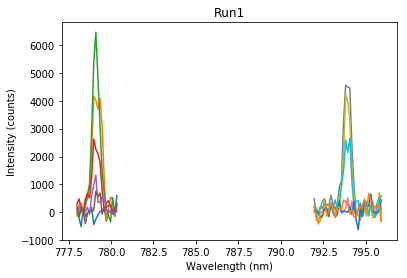

In [8]:
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
plt.title("Run1")
plt.plot(wl_peak1,data_peak1_run1)
plt.plot(wl_peak2,data_peak2_run1)

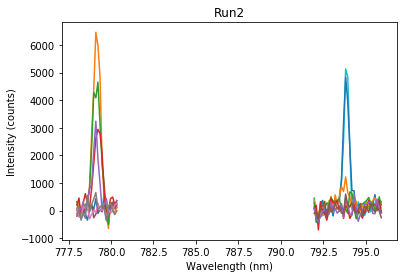

In [9]:
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
plt.title("Run2")
plt.plot(wl_peak1,data_peak1_run2)
plt.plot(wl_peak2,data_peak2_run2)

In [10]:
avg_peak1_run1 = []
avg_peak2_run1 = []
avg_peak1_run2 = []
avg_peak2_run2 = []

for frame in data_peak1_run1:
    maximum = data_peak1_run1[frame].max()
    avg_peak1_run1 = np.append(avg_peak1_run1, maximum)
    
for frame in data_peak2_run1:
    maximum = data_peak2_run1[frame].max()
    avg_peak2_run1 = np.append(avg_peak2_run1, maximum)
    
for frame in data_peak1_run2:
    maximum = data_peak1_run2[frame].max()
    avg_peak1_run2 = np.append(avg_peak1_run2, maximum)
    
for frame in data_peak2_run2:
    maximum = data_peak2_run2[frame].max()
    avg_peak2_run2 = np.append(avg_peak2_run2, maximum)
    



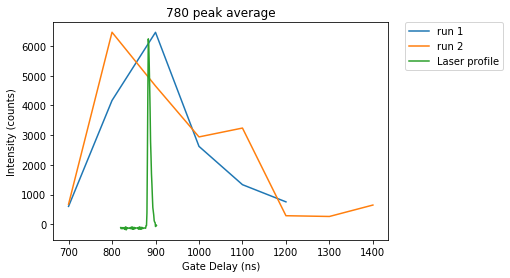

In [35]:
plt.xlabel("Gate Delay (ns)")
plt.ylabel("Intensity (counts)")
plt.title("780 peak average")
plt.plot(time_run1, avg_peak1_run1, label = "run 1")
plt.plot(time_run2, avg_peak1_run2, label = "run 2")
plt.plot(laser_time, laser_data, label = "Laser profile")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

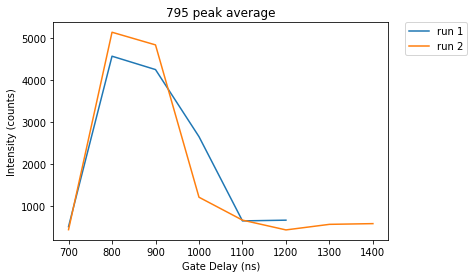

In [12]:
plt.xlabel("Gate Delay (ns)")
plt.ylabel("Intensity (counts)")
plt.title("795 peak average")
plt.plot(time_run1, avg_peak2_run1, label = "run 1")
plt.plot(time_run2, avg_peak2_run2, label = "run 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)